# Import necessary libraries and load the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline

# Load and inspect the dataset

In [3]:
df = pd.read_csv('C:\\Users\\Admin\\Downloads\\TCS1.csv')
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
5,2004-09-03,125.750000,137.500000,123.794998,124.732498,91.309212,9869856.0
6,2004-09-06,129.987503,129.987503,124.112503,124.357498,91.034721,9038672.0
7,2004-09-07,129.375000,129.375000,124.375000,124.449997,91.102440,5772232.0
8,2004-09-08,124.500000,125.099998,123.887497,124.212502,90.928566,6593984.0
9,2004-09-09,124.625000,124.737503,122.307503,122.495003,89.671310,7947184.0


# Define selected features and handle missing data

In [4]:
selected_features = ['Open', 'High', 'Low', 'Close']

In [5]:
df.fillna(method='ffill', inplace=True)

# Feature scaling (MinMax scaling)

In [6]:
scaler = MinMaxScaler()
df[selected_features] = scaler.fit_transform(df[selected_features])

# Sequence data preparation (Sliding window)

In [7]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 10
X, y = create_sequences(df[selected_features].values, window_size)

# Split the data into training and testing sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# Build and train the LSTM model

In [9]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(window_size, len(selected_features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
113/113 [==============================] - 8s 14ms/step - loss: 0.0049
Epoch 2/10
113/113 [==============================] - 2s 13ms/step - loss: 4.0405e-05
Epoch 3/10
113/113 [==============================] - 1s 12ms/step - loss: 3.4322e-05
Epoch 4/10
113/113 [==============================] - 1s 13ms/step - loss: 3.4459e-05
Epoch 5/10
113/113 [==============================] - 2s 15ms/step - loss: 3.1971e-05
Epoch 6/10
113/113 [==============================] - 1s 12ms/step - loss: 3.1222e-05
Epoch 7/10
113/113 [==============================] - 1s 13ms/step - loss: 3.0541e-05
Epoch 8/10
113/113 [==============================] - 2s 14ms/step - loss: 3.1030e-05
Epoch 9/10
113/113 [==============================] - 1s 12ms/step - loss: 3.0439e-05
Epoch 10/10
113/113 [==============================] - 1s 10ms/step - loss: 2.7898e-05


# Make predictions on the test set

In [11]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Flatten the predictions

29/29 [==============================] - 1s 7ms/step


# Calculate evaluation metrics

In [12]:
# Ensure that y_test contains only one column, e.g., the 'Close' price
# It should have the same shape as y_pred
y_test = y_test[:, 3]  # Assuming 'Close' is your target variable (4th column)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Flatten the predictions

# Calculate evaluation metrics with the updated y_test
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")


29/29 [==============================] - 0s 9ms/step
Mean Squared Error: 0.0029145626770691172
Mean Absolute Error: 0.0411560144203487


# Visualization

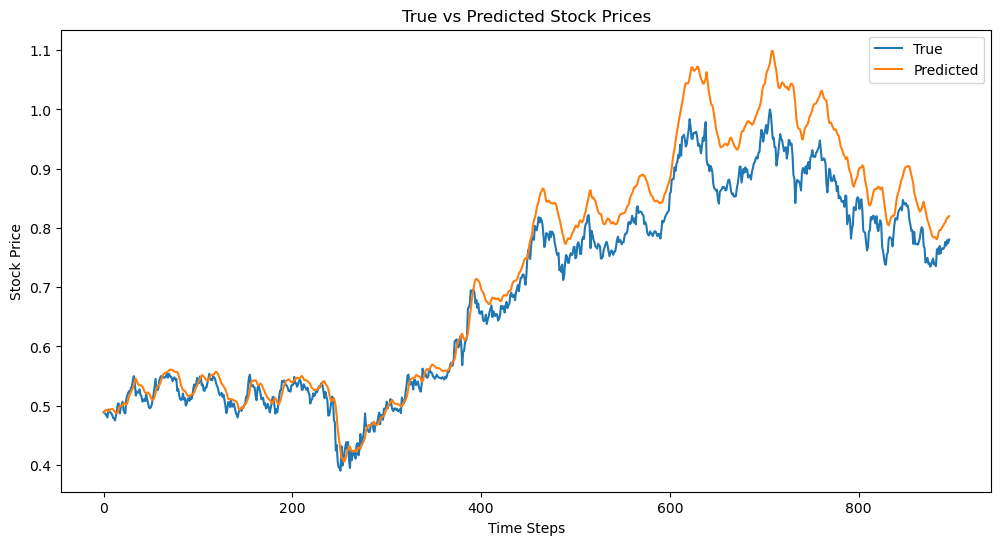

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.title('True vs Predicted Stock Prices')
plt.show()